# Veri Bilimi için İstatistik

## Örnek Teorisi

In [2]:
import numpy as np

In [3]:
populasyon = np.random.randint(0,80,10000)
populasyon

array([ 0, 48, 59, ..., 65, 41,  6])

In [4]:
#örneklem çekimi
np.random.seed(100) #seed = yapılacak olan işlemlerin her tekrarında aynı örneklem, torbaya geri koyma örneği gibi
orneklem = np.random.choice(a = populasyon, size = 100)
orneklem[0:10]

array([ 4, 36,  1, 48,  8, 49, 76, 36, 20, 48])

In [5]:
orneklem.mean()

36.6

In [6]:
populasyon.mean()

39.1174

In [7]:
#örneklem dağılımı
np.random.seed(10) 
orneklem1 = np.random.choice(a = populasyon, size = 100)
orneklem2 = np.random.choice(a = populasyon, size = 100)
orneklem3 = np.random.choice(a = populasyon, size = 100)
orneklem4 = np.random.choice(a = populasyon, size = 100)
orneklem5 = np.random.choice(a = populasyon, size = 100)
orneklem6 = np.random.choice(a = populasyon, size = 100)
orneklem7 = np.random.choice(a = populasyon, size = 100)
orneklem8 = np.random.choice(a = populasyon, size = 100)
orneklem9 = np.random.choice(a = populasyon, size = 100)
orneklem10 = np.random.choice(a = populasyon, size = 100)

In [8]:
(orneklem1.mean() + orneklem2.mean()+ orneklem3.mean()+ orneklem4.mean()+ orneklem5.mean()+ orneklem6.mean()+ 
 orneklem7.mean()+ orneklem8.mean()+ orneklem9.mean()+ orneklem10.mean()) / 10

38.948

In [9]:
orneklem1.mean()

38.51

In [10]:
orneklem2.mean()

39.56

***sonuçlar neredeyse aynı***

## Betimsel İstatistikler

In [11]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [13]:
!pip install researchpy
import researchpy as rp

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [14]:
rp.summary_cont(df[["total_bill","tip","size"]])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,total_bill,244.0,19.7859,8.9024,0.5699,18.6633,20.9086
1,tip,244.0,2.9983,1.3836,0.0886,2.8238,3.1728
2,size,244.0,2.5697,0.9511,0.0609,2.4497,2.6896


In [15]:
rp.summary_cat(df[["sex","smoker","day","time"]])

,Variable,Outcome,Count,Percent
0,sex,Male,157,64.34
1,,Female,87,35.66
2,smoker,No,151,61.89
3,,Yes,93,38.11
4,day,Sat,87,35.66
5,,Sun,76,31.15
6,,Thur,62,25.41
7,,Fri,19,7.79
8,time,Dinner,176,72.13
9,,Lunch,68,27.87


In [16]:
df[["tip","total_bill"]].cov()

,tip,total_bill
tip,1.914455,8.323502
total_bill,8.323502,79.252939


In [17]:
df[["tip","total_bill"]].corr()
# 0.67 = pozitif yönlü orta şiddetli bir korelasyon 

,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


## Güven Aralığı

Anakütle parametresinin tahmini değerini kapsayabilecek aralıktır.

**Adım 1:** n, ortalama ve standart sapmayı bul.

**Adım 2:** güven aralığına karar ver. (95,99..)

**Adım 3:** z tablo değerini hesapla. (95 için 1,96)

**Adım 4:** güven aralığını hesapla: 

$\bar{x} \pm z \frac{s}{\sqrt{n}}$


### İş Uygulaması: Fiyat Stratejisi Karar Destek Sistemi

* **Problem:** CEO fiyat belirleme konusunda bilimsel bir dayanak ve esneklik istiyor.
* **Detaylar:** Satıcı, alıcı ve bir ürün var. Alıcılara ürüne ne kadar ücret öderdiniz diye soruluyor. Optimum fiyat bilimsel ve esnek olarak bulunmak isteniyor.

In [18]:
import numpy as np
fiyat = np.random.randint(10,110,1000)

In [19]:
fiyat.mean()

58.492

In [20]:
import statsmodels.stats.api as sms
sms.DescrStatsW(fiyat).tconfint_mean() #default = %95 güven aralığı

(56.67953887736034, 60.30446112263965)

## Olasılık ve Olasılık Dağılımları

* **Kesikli Olasılık Dağılımları:** Bernoulli, Binom, Poisson...
* **Sürekli Olasılık Dağılımları:** Normal, Üniform, Üstel...

### Bernoulli Dağılımı
Başarılı - başarısız, olumlu - olumsuz şeklindeki iki sonuçlu olaylar ile ilgilenildiğinde kullanılır.

${\displaystyle f(k;p)=p^{k}(1-p)^{1-k}\quad {\text{for }}k\in \{0,1\}}$


${\displaystyle \operatorname {E} \left(X\right)=p}$

$\operatorname {Var} [X]=pq=p(1-p)$

In [21]:
from scipy.stats import bernoulli
p = 0.6 # diyelim
ber = bernoulli(p)
ber.pmf(k = 0) # pmf = olasılık kütle fonksiyonu

0.4

In [22]:
ber.pmf(k=1)

0.6

## Büyük Sayılar Yasası

Bir rassal değişkenin uzun vadeli kararlılığını tanımlayan olasılık teoremidir.

In [23]:
import numpy as np
rng = np.random.RandomState(123)
for i in np.arange(1,21):
    deney_sayisi = 2**i
    yazi_turalar = rng.randint(0,2, size = deney_sayisi)
    yazi_olasiliklari = np.mean(yazi_turalar)
    print("Atış Sayısı:",deney_sayisi,"---",'Yazı Olasılığı: %.2f' % (yazi_olasiliklari * 100))

Atış Sayısı: 2 --- Yazı Olasılığı: 50.00
Atış Sayısı: 4 --- Yazı Olasılığı: 0.00
Atış Sayısı: 8 --- Yazı Olasılığı: 62.50
Atış Sayısı: 16 --- Yazı Olasılığı: 43.75
Atış Sayısı: 32 --- Yazı Olasılığı: 46.88
Atış Sayısı: 64 --- Yazı Olasılığı: 56.25
Atış Sayısı: 128 --- Yazı Olasılığı: 50.78
Atış Sayısı: 256 --- Yazı Olasılığı: 52.73
Atış Sayısı: 512 --- Yazı Olasılığı: 52.93
Atış Sayısı: 1024 --- Yazı Olasılığı: 50.20
Atış Sayısı: 2048 --- Yazı Olasılığı: 48.58
Atış Sayısı: 4096 --- Yazı Olasılığı: 49.49
Atış Sayısı: 8192 --- Yazı Olasılığı: 49.58
Atış Sayısı: 16384 --- Yazı Olasılığı: 49.96
Atış Sayısı: 32768 --- Yazı Olasılığı: 50.00
Atış Sayısı: 65536 --- Yazı Olasılığı: 49.68
Atış Sayısı: 131072 --- Yazı Olasılığı: 49.97
Atış Sayısı: 262144 --- Yazı Olasılığı: 50.13
Atış Sayısı: 524288 --- Yazı Olasılığı: 50.01
Atış Sayısı: 1048576 --- Yazı Olasılığı: 50.09


### Binom Dağılımı

Bağımsız n deneme sonucu k başarılı olma olasılığı ile ilgilenildiğinde kullanılır.

${\displaystyle f(k;n,p)={n \choose k}p^{k}(1-p)^{n-k}}$, k = 0, 1, 2, ...,n


${\displaystyle \operatorname {E} (X)=np}$


${\displaystyle \operatorname {Var} (X)=np(1-p)}$

### İş Uygulaması: Reklam Harcaması Optimizasyonu

* **Problem:** Çeşitli mecralara reklam veriliyor, reklamların tıklanma ve geri dönüşüm oranları optimize edilmeye çalışılıyor. Buna yönelik olarak belirli bir mecrada çeşitli senaryolara göre reklama tıklama olasılıkları hesaplanmak isteniyor.
* **Detaylar:** Bir mecrada reklam verilecek. Dağılım ve reklama tıklama olasılıkğı biliniyor (0.01)
* **Soru:** Reklamı 100 kişi gördüğünde 1 tıklanması olasılığı nedir?

In [24]:
from scipy.stats import binom
p = 0.01
n = 100
binom = binom(n,p)
print(binom.pmf(1))
print(binom.pmf(5))
print(binom.pmf(10))

0.36972963764971983
0.0028977871237616114
7.006035693977161e-08


### Poisson Dağılımı

Belirli bir zaman aralığında belirli bir alanda nadiren rastlanan olayların olasılıklarını hesaplamak için kullanılır.


${\displaystyle f(x,\lambda )={\frac {\lambda ^{x}e^{-\lambda }}{x!}}\,\!}$,  x = 0,1,2,...,n

E(X) = $ \lambda $  
Var(X) = $ \lambda $

**n > 50 ve n*p < 5** sağlıyorsa ***nadir olay*** denir.

### İş Uygulaması: İlan Girişi Hata Olasılıklarının Hesaplanması

* **Problem:** Hatalı ilan girişi olasılıkları hesaplanmak isteniyor.
* **Detaylar:** Bir yıl süresince ölçüm yapılıyor. Dağılım Poisson ve lambda (ortalama hata sayısı) = 0.1 olduğu biliniyor.
* **Soru:** Hiç hata olmaması, 3 hata olması ve 5 hata olması olasıklıkları nedir?

In [25]:
from scipy.stats import poisson
lambda_ = 0.1 
pois = poisson(mu = lambda_)
pois.pmf(k = 0)

0.9048374180359595

In [26]:
pois.pmf(k = 3)

0.00015080623633932676

In [27]:
pois.pmf(k = 5)

7.54031181696634e-08

### Normal Dağılım

Normal dağıldığı bilinen sürekli rassal değişkenler için olasılık hesaplaması için kullanılır.

${\displaystyle f(x\mid \mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}}$

* $\mu$  ortalama ya da dağılımın beklenen değeri

* ${\displaystyle \sigma }$  standart sapma

* ${\displaystyle \sigma ^{2}}$ varyans

### İş Uygulaması: Ürün Satış Olasılıklarının Hesaplanması

* **Problem:** Bir yatırım/toplantı öncesinde gelecek ay ile ilgili satışların belirli değerlerde gerçekleşmesi olasılıkları belirlenmek isteniyor.
* **Detaylar:** Dağılımın normal olduğu biliniyor. Aylık ortalama satış sayısı 80K, standart sapması 5K'dır. 

In [28]:
from scipy.stats import norm

In [29]:
# 90K'dan fazla satış yapma olasılığı nedir?

1-norm.cdf(90,80,5) #(istenilen, ortalama, std)

0.02275013194817921

In [30]:
# 70'ten fazla olması

1-norm.cdf(70,80,5)

0.9772498680518208

In [31]:
# 73'ten az olması

norm.cdf(73,80,5)

0.08075665923377107

In [32]:
# 85 ile 90 arasında olması

norm.cdf(90,80,5) - norm.cdf(85,80,5)

0.13590512198327787

## Hipotez Testi

Bir tahmini test etmek için kullanılan istatistiksel bir tekniktir.

**Türler**

<d><i>H</i><sub>0</sub>: <i>μ</i> = <i>50</i></d>   
<d><i>H</i><sub>1</sub>: <i>μ</i> ≠ <i>50</i></d><br><br>
<d><i>H</i><sub>0</sub>: <i>μ</i> <= <i>50</i></d><br>
<d><i>H</i><sub>1</sub>: <i>μ</i> > <i>50</i></d><br><br>
<d><i>H</i><sub>0</sub>: <i>μ</i> >= <i>50</i></d><br>
<d><i>H</i><sub>1</sub>: <i>μ</i> < <i>50</i></d><br><br>

**Adımlar**

**Adım 1:** Hipotezlerin kurulması ve yönlerinin belirlenmesi

**Adım 2:** Anlamlılık düzeyinin ve teblo değerinin belirlenmesi

**Adım 3:** Test istatistiğinin belirlenmesi ve hesaplanması

**Adım 4:** Hesaplanan test istatistiği ile alfaya karşılık gelen tablo değerinin karşılaştırılması.

***Test İstatistiği (Zh) > Tablo Değeri (Zt) ise H0 Red***

**Adım 5:** Yorum

## p-value

**p < 0.05 ise SEVİN!!**

**H0 hipotezi RED!!** 

*her zaman değil*

## Tek Örneklem T Testi

Popülasyon ortalaması ile varsayımsal bir değer arasında anlamlı bir farklılık olup olmadığını test eder.

**Test İstatistiği:**

${\displaystyle t={\frac {{\bar {x}}-\mu _{0}}{\frac {s}{\sqrt {n}}}}}$

${\displaystyle z={\frac {{\bar {x}}-\mu _{0}}{\frac {\sigma}{\sqrt {n}}}}}$

- Anakütle standart sapması biliniyorsa **z istatistiği** kullanılır.
- Anakütle standart sapması bilinmiyorsa  ve n > 30 ise **z istatistiği** kullanılır.
- Anakütle standart sapması bilinmiyorsa  ve n < 30 ise **t istatistiği** kullanılır.

### İş Uygulaması: Web Sitesinde Geçirilen Sürenin Testi

* **Problem:** Web sitesinde geçirilen ortalama süre gerçekten 170 saniye mi?
* **Detaylar:** Yazılımlardan elde edilen web sitesinde geçirilen ortalama süreler var. Bu veriler incelendiğinde bir yönetici ya da çalışanımız bu değerlerin böyle olmadığına yönelik düşünceler taşıyor ve bu durumu test etmek istiyorlar.

In [33]:
import numpy as np

olcumler = np.array([17, 160, 234, 149, 145, 107, 197, 75, 201, 225, 211, 119, 
              157, 145, 127, 244, 163, 114, 145,  65, 112, 185, 202, 146,
              203, 224, 203, 114, 188, 156, 187, 154, 177, 95, 165, 50, 110, 
              216, 138, 151, 166, 135, 155, 84, 251, 173, 131, 207, 121, 120])

In [34]:
olcumler[0:10]

array([ 17, 160, 234, 149, 145, 107, 197,  75, 201, 225])

In [35]:
import scipy.stats as stats

In [36]:
stats.describe(olcumler)

DescribeResult(nobs=50, minmax=(17, 251), mean=154.38, variance=2578.0363265306123, skewness=-0.32398897278694483, kurtosis=-0.05849823498415985)

### Varsayımlar

#### Normallik Varsayımı

Grafikle ya da test ile gerçekleştirilebilir.

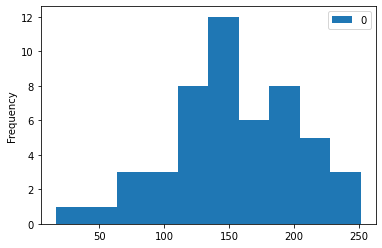

In [37]:
# histogram
import pandas as pd
pd.DataFrame(olcumler).plot.hist();

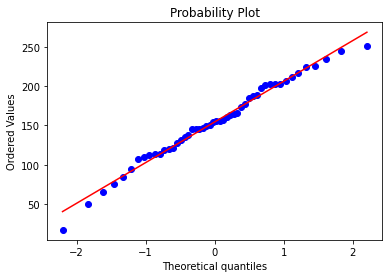

In [38]:
# qqplot
import pylab
stats.probplot(olcumler, dist = "norm", plot = pylab)
pylab.show()

#### Shapiro-Wilks testi
H0 : örnek dağılımı ile teorik normal dağılımı arasında istatistiksel olarak anlamlı bir farklılık yoktur.

H1 : örnek dağılımı ile teorik normal dağılımı arasında istatistiksel olarak anlamlı bir farklılık vardır.

In [39]:
from scipy.stats import shapiro
shapiro(olcumler)

ShapiroResult(statistic=0.9853105545043945, pvalue=0.7848747968673706)

In [40]:
print("Hesap İstatistiği:" + " " + str(shapiro(olcumler)[0]))
print("Hesaplanan p-value:" + " " + str(shapiro(olcumler)[1]))

Hesap İstatistiği: 0.9853105545043945
Hesaplanan p-value: 0.7848747968673706


**p-value değeri > 0.05 olduğu için H0 reddedilemez.**

In [41]:
# hipotez testi uygulanması

H0: Web sitemizde geçirilen ortalama süre 170'tir.

H1: Web sitemizde geçirilen ortalama süre 170 değildir.

In [42]:
stats.ttest_1samp(olcumler, popmean = 170)

Ttest_1sampResult(statistic=-2.1753117985877966, pvalue=0.034460415195071446)

**p-value değeri < 0.05 olduğu için H0 red.**

## Nonparametrik Tek Örneklem Testi

In [43]:
from statsmodels.stats.descriptivestats import sign_test

In [44]:
sign_test(olcumler, 170)

(-7.0, 0.06490864707227219)

## Tek Örneklem Oran Testi

<d><i>H</i><sub>0</sub>: <i>P</i> = <i>P0</i></d>   
<d><i>H</i><sub>1</sub>: <i>P</i> ≠ <i>P0</i></d><br><br>
<d><i>H</i><sub>0</sub>: <i>P</i> <= <i>P0</i></d><br>
<d><i>H</i><sub>1</sub>: <i>P</i> > <i>P0</i></d><br><br>
<d><i>H</i><sub>0</sub>: <i>P</i> >= <i>P0</i></d><br>
<d><i>H</i><sub>1</sub>: <i>P</i> < <i>P0</i></d><br><br>

### İş Uygulaması: Dönüşüm Oranı Testi

* **Problem:** Bir yazılım ile bir mecrada reklam verilmiş ve bu reklama ilişkin yazılım tarafından 0.125 dönüşüm oranı elde edildiği ifade edilmiş. Fakat bu durum kontrol edilmek isteniyor. Çünkü bu yüksek bir oran ve gelirler incelendiğinde örtüşmüyor.
* **Detaylar:** 500 kişi dış mecrada reklamlara tıklamış. 40 tanesi sitemize gelip alışveriş yapmış. Örnek üzerinden elde edilen dönüşüm oranı: 40/500 = 0.08

H0: p = 0.125

H1: p != 0.125

In [45]:
from statsmodels.stats.proportion import proportions_ztest

In [46]:
count = 40 #başarı sayısı
nobs = 500 #gözlem
value = 0.125 #test edilmek istenen değer

In [47]:
proportions_ztest(count, nobs, value) #soldaki test istatistiği, sağdaki p-value

(-3.7090151628513017, 0.0002080669689845979)

In [48]:
# p-value < 0.05 olduğu için H0 RED!!

## Bağımsız İki Örneklem T Testi (AB Testi)

İki grup ortalaması arasında karşılaştırma yapılmak istenildiğinde kullanılır.

 ### İş Uygulaması: ML Modelinin Başarı Testi (AB Testi)
 
* **Problem:** Bir ML projesine yatırım yapılmış. Ürettiği tahminler neticesinde oluşan gelir ile eski sistemin ürettiği gelirler karşılaştırılıp anlamlı farklılık olup olmadığı test edilmek isteniyor.
* **Detaylar:** Model geliştirilmiş ve web sitesine entegre edilmiş. Site kullanıcıları belirli bir kurala göre ikiye bölünmüş olsun. A grubu eski B grubu yeni sistem. Gelir anlamında anlamlı bir iş yapılıp yapılmadığı test edilmek isteniyor.

H0: M1 = M2

H1: M1 =! M2

In [49]:
# VERİ TİPİ 1

In [50]:
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,
        25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,
        32,33,33,33,31,32,33,26,32,33,29])

A_B = pd.concat([A,B], axis = 1)
A_B.columns = ["A","B"]

A_B.T

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
A,30,27,21,27,29,30,20,20,27,32,...,21,18,24,26,33,26,27,28,19,25
B,37,39,31,31,34,38,30,36,29,28,...,33,33,33,31,32,33,26,32,33,29


In [51]:
# VERİ TİPİ 2

In [52]:
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,
        25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,
        32,33,33,33,31,32,33,26,32,33,29])

#A ve A'nın grubu
GRUP_A = np.arange(len(A))
GRUP_A = pd.DataFrame(GRUP_A)
GRUP_A[:] = "A"
A = pd.concat([A, GRUP_A], axis = 1)

#B ve B'nin Grubu
GRUP_B = np.arange(len(B))
GRUP_B = pd.DataFrame(GRUP_B)
GRUP_B[:] = "B"
B = pd.concat([B, GRUP_B], axis = 1)

#Tum veri
AB = pd.concat([A,B])
AB.columns = ["gelir","GRUP"]
print(AB.head())
print(AB.tail())

   gelir GRUP
0     30    A
1     27    A
2     21    A
3     27    A
4     29    A
    gelir GRUP
25     33    B
26     26    B
27     32    B
28     33    B
29     29    B


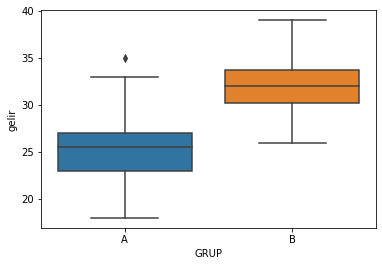

In [53]:
import seaborn as sns
sns.boxplot(x = "GRUP", y = "gelir", data = AB);

### Varsayım Kontrolü

In [54]:
A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [55]:
AB.head()

,gelir,GRUP
0,30,A
1,27,A
2,21,A
3,27,A
4,29,A


In [56]:
# normallik varsayımı

In [57]:
from scipy.stats import shapiro
# H0: Normal dağılım ile teorik dağılım arasında fark yoktur.
shapiro(A_B.A) #HO RED

ShapiroResult(statistic=0.9789242148399353, pvalue=0.7962799668312073)

In [58]:
shapiro(A_B.B) #HO RED

ShapiroResult(statistic=0.9561261534690857, pvalue=0.2458445429801941)

In [59]:
# varyans homojenliği varsayımı
# H0: Varyanslar homojendir.

In [60]:
stats.levene(A_B.A, A_B.B) #H0 RED 

LeveneResult(statistic=1.1101802757158004, pvalue=0.2964124900636569)

### Hipotez Testi

H0: İki ortalama arasında fark yoktur.

In [61]:
stats.ttest_ind(A_B["A"],A_B["B"], equal_var = True) # HO RED 

Ttest_indResult(statistic=-7.028690967745927, pvalue=2.6233215605475075e-09)

In [62]:
test_istatistigi, pvalue = stats.ttest_ind(A_B["A"],A_B["B"], equal_var = True)
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue)) # noktadan sonra 4 basamak

Test İstatistiği = -7.0287, p-değeri = 0.0000


## Nonparametrik Bağımsız İki Örneklem Testi

In [63]:
stats.mannwhitneyu(A_B["A"],A_B["B"])

MannwhitneyuResult(statistic=89.5, pvalue=4.778975189306267e-08)

In [64]:
test_istatistigi, pvalue = stats.mannwhitneyu(A_B["A"],A_B["B"])
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Test İstatistiği = 89.5000, p-değeri = 0.0000


## Bağımlı İki Örneklem T Testi

Bağımlı iki grup ortalaması arasında karşılaştırma yapılmak istenildiğinde kullanılır.

### İş Uygulaması: Şirket içi Eğitimin Performans Etkisi Ölçümü

* **Problem:** Belirli uğraşlar sonucu alınan eğitimin katma değer sağlayıp sağlamadığı ölçülmek isteniyor.
* **Detaylar:** Bir departman bir konuda eğitim talep ediyor. Eğitimden önce ve sonra olacak şekilde ölçüm yapılıyor.

H0: Mö = Ms
    
H1: Mö =! Ms

In [65]:
oncesi = pd.DataFrame([123,119,119,116,123,123,121,120,117,118,121,121,123,119,
            121,118,124,121,125,115,115,119,118,121,117,117,120,120,
            121,117,118,117,123,118,124,121,115,118,125,115])

sonrasi = pd.DataFrame([118,127,122,132,129,123,129,132,128,130,128,138,140,130,
             134,134,124,140,134,129,129,138,134,124,122,126,133,127,
             130,130,130,132,117,130,125,129,133,120,127,123])

In [66]:
#veri seti 1
ayrik = pd.concat([oncesi,sonrasi] , axis = 1)
ayrik.columns = ["ONCESİ","SONRASİ"]
ayrik.head()

,ONCESİ,SONRASİ
0,123,118
1,119,127
2,119,122
3,116,132
4,123,129


In [67]:
#veri seti 2
grup_oncesi = np.arange(len(oncesi))
grup_oncesi = pd.DataFrame(grup_oncesi)
grup_oncesi[:] = "ONCESİ"

A = pd.concat([oncesi, grup_oncesi], axis = 1)

grup_sonrasi = np.arange(len(sonrasi))
grup_sonrasi = pd.DataFrame(grup_sonrasi)
grup_sonrasi[:] = "SONRASİ"

B = pd.concat([sonrasi, grup_sonrasi], axis = 1)

birlikte = pd.concat([A,B])

birlikte.columns = ["PERFORMANS", "ZAMAN"]
birlikte.head()

,PERFORMANS,ZAMAN
0,123,ONCESİ
1,119,ONCESİ
2,119,ONCESİ
3,116,ONCESİ
4,123,ONCESİ


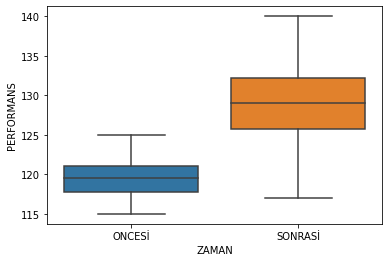

In [68]:
sns.boxplot("ZAMAN","PERFORMANS",data=birlikte);

### Varsayım Kontrolleri

In [69]:
from scipy.stats import shapiro
shapiro(ayrik.ONCESİ)

ShapiroResult(statistic=0.9543654918670654, pvalue=0.10722342133522034)

In [70]:
shapiro(ayrik.SONRASİ)

ShapiroResult(statistic=0.9780087471008301, pvalue=0.6159457564353943)

In [71]:
stats.levene(ayrik.ONCESİ,ayrik.SONRASİ)

LeveneResult(statistic=8.31303288672351, pvalue=0.0050844511807370246)

### Hipotez Testi

In [72]:
stats.ttest_rel(ayrik.ONCESİ,ayrik.SONRASİ)

Ttest_relResult(statistic=-9.281533480429937, pvalue=2.0235251764440722e-11)

In [73]:
test_istatistigi, pvalue = stats.ttest_rel(ayrik.ONCESİ,ayrik.SONRASİ)
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Test İstatistiği = -9.2815, p-değeri = 0.0000


**H0 RED. ORTALAMALAR ARASINDA FARK VARDIR. EĞİTİM İŞE YARAMIŞTIR.**

## Nonparametrik Bağımlı İki Örneklem Testi

In [74]:
stats.wilcoxon(ayrik.ONCESİ,ayrik.SONRASİ)

WilcoxonResult(statistic=15.0, pvalue=2.491492033374464e-07)

In [75]:
test_istatistigi, pvalue = stats.wilcoxon(ayrik.ONCESİ,ayrik.SONRASİ)
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Test İstatistiği = 15.0000, p-değeri = 0.0000


## İki Örneklem Oran Testi

İki oran arasında karşılaştırma yapmak için kullanılır.

<d><i>H</i><sub>0</sub>: <i>P1</i> = <i>P2</i></d>   
<d><i>H</i><sub>1</sub>: <i>P1</i> ≠ <i>P2</i></d><br><br>
<d><i>H</i><sub>0</sub>: <i>P1</i> <= <i>P2</i></d><br>
<d><i>H</i><sub>1</sub>: <i>P1</i> > <i>P2</i></d><br><br>
<d><i>H</i><sub>0</sub>: <i>P1</i> >= <i>P2</i></d><br>
<d><i>H</i><sub>1</sub>: <i>P1</i> < <i>P2</i></d><br><br>

n1 > 30

n2 > 30

### İş Uygulaması: Kullanıcı Arayüzü Deneyi (AB Testi)

* **Problem:** Kullanıcı arayüzünde hangi buton kullanılmalıdır? Kırmızı mı yeşil mi?

H0 : P1 <= P2
    
H1 : P1 > P2

In [77]:
from statsmodels.stats.proportion import proportions_ztest

In [78]:
basari_sayisi = np.array([300,250])
gözlem_sayisi = np.array([1000,1100])

In [79]:
proportions_ztest(count= basari_sayisi, nobs = gözlem_sayisi)

(3.7857863233209255, 0.0001532232957772221)

**H0 RED. BUTONLARIN ETKİSİ FARKLIDIR.**

## Varyans Analizi

İki ya da daha fazla grup ortalaması arasında istatistiksel olarak anlamlı farklılık olup olmadığını öğrenilmek istenildiğinde kullanılır.

<d><i>H</i><sub>0</sub>: <i>μ1</i> = <i>μ2</i> = <i>μ3</i></d>   
<d><i>H</i><sub>1</sub>: Eşit Değillerdir (en az birisi farklıdır)</d><br><br>

### İş Uygulaması: Anasayfa İçerik Stratejisi Belirlemek

* **Problem:** Anasayfada geçirilen süre artırılmak isteniyor.
* **Detaylar:** Bir web sitesi için başarı kriterleri: ortalama ziyaret süresi, hemen çıkış oranı vb.
Uzun zaman geçiren kullanıcıların reklamlara daha fazla tıkladığı ve markaya olan bağlılıklarının arttığı biliniyor. Buna yönelik olarak benzer haberler farklı resimler ya da farklı formatlarda hazırlanarak oluşturulan test gruplarına gösteriliyor. A: Doğal Şekilde, B: Yönlendirici, C: İlgi Çekici

In [80]:
A = pd.DataFrame([28,33,30,29,28,29,27,31,30,32,28,33,25,29,27,31,31,30,31,34,30,32,31,34,28,32,31,28,33,29])

B = pd.DataFrame([31,32,30,30,33,32,34,27,36,30,31,30,38,29,30,34,34,31,35,35,33,30,28,29,26,37,31,28,34,33])

C = pd.DataFrame([40,33,38,41,42,43,38,35,39,39,36,34,35,40,38,36,39,36,33,35,38,35,40,40,39,38,38,43,40,42])

dfs = [A, B, C]

ABC = pd.concat(dfs, axis = 1)
ABC.columns = ["GRUP_A","GRUP_B","GRUP_C"]
ABC.head()

,GRUP_A,GRUP_B,GRUP_C
0,28,31,40
1,33,32,33
2,30,30,38
3,29,30,41
4,28,33,42


### Varsayım Kontrolü

In [81]:
shapiro(ABC["GRUP_A"])

ShapiroResult(statistic=0.9697431921958923, pvalue=0.5321715474128723)

In [82]:
shapiro(ABC["GRUP_B"])

ShapiroResult(statistic=0.9789854884147644, pvalue=0.7979801297187805)

In [83]:
shapiro(ABC["GRUP_C"])

ShapiroResult(statistic=0.9579201340675354, pvalue=0.273820161819458)

In [84]:
stats.levene(ABC["GRUP_A"],ABC["GRUP_B"],ABC["GRUP_C"])

LeveneResult(statistic=1.0267403645055275, pvalue=0.36247110117417064)

### Hipotez Testi

In [85]:
from scipy.stats import f_oneway

In [86]:
f_oneway(ABC["GRUP_A"],ABC["GRUP_B"],ABC["GRUP_C"])

F_onewayResult(statistic=74.69278140730431, pvalue=1.3079050746811477e-19)

In [87]:
test_istatistigi, pvalue = f_oneway(ABC["GRUP_A"],ABC["GRUP_B"],ABC["GRUP_C"])
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Test İstatistiği = 74.6928, p-değeri = 0.0000


**GRUPLAR ARASI İSTATİSTİKİ OLARAK ANLAMLI BİR FARKLILIK VARDIR.**

In [90]:
ABC.describe().T

,count,mean,std,min,25%,50%,75%,max
GRUP_A,30.0,30.133333,2.224214,25.0,28.25,30.0,31.75,34.0
GRUP_B,30.0,31.700000,2.937862,26.0,30.00,31.0,34.00,38.0
GRUP_C,30.0,38.100000,2.808239,33.0,36.00,38.0,40.00,43.0


## Nonparametrik Hipotez Testi

In [96]:
# eğer varsayımlar sağlanmasaydı
from scipy.stats import kruskal

In [97]:
kruskal(ABC["GRUP_A"],ABC["GRUP_B"],ABC["GRUP_C"])

KruskalResult(statistic=54.19819735523783, pvalue=1.7022015426175926e-12)

In [98]:
test_istatistigi, pvalue = kruskal(ABC["GRUP_A"],ABC["GRUP_B"],ABC["GRUP_C"])
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Test İstatistiği = 54.1982, p-değeri = 0.0000


## Korelasyon Analizi

Değişkenler arasındaki ilişki, bu ilişkinin yönü ve şiddeti ile ilgili bilgiler sağlar.

**Varsayımlar:**
- İki değişken için de normallik varsayımı
- Varsayım sağlanıyorsa Pearson Korelasyon Katsayısı.
- Varsayım sağlanmıyorsa Spearman Korelasyon Katsayısı

### İş Uygulaması: Bahşiş ile Hesap Arasındaki İlişkinin İncelenmesi

H0: p = 0

H1: p =! 0 

(p = rho katsayısı)

In [100]:
import seaborn as sns
tip = sns.load_dataset("tips")
df = tip.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [101]:
#toplam hesabın içinde tip de olduğu için onu çıkarıyoruz.
df["total_bill"] = df["total_bill"] - df["tip"]

In [102]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,15.98,1.01,Female,No,Sun,Dinner,2
1,8.68,1.66,Male,No,Sun,Dinner,3
2,17.51,3.50,Male,No,Sun,Dinner,3
3,20.37,3.31,Male,No,Sun,Dinner,2
4,20.98,3.61,Female,No,Sun,Dinner,4


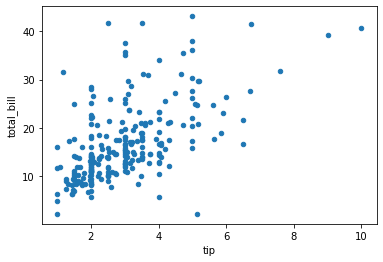

In [104]:
df.plot.scatter("tip","total_bill");

### Varsayım Kontrolü

In [108]:
shapiro(df.total_bill)

ShapiroResult(statistic=0.9135652184486389, pvalue=1.1060377613780759e-10)

In [109]:
shapiro(df.tip)

ShapiroResult(statistic=0.897811233997345, pvalue=8.20057563521992e-12)

**H0 RED, ANLAMLI BİR FARKLILIK VARDIR. ÖRNEKLEM VE NORMALLİK DAĞILIMLARI BİRBİRİNE BENZEMİYOR, NORMALLİK VARSAYIMI SAĞLANMADI.**

### Hipotez Testi

#### Korelasyon Katsayısı

In [114]:
df["tip"].corr(df["total_bill"])

0.5766634471096374

In [115]:
df["tip"].corr(df["total_bill"], method = "spearman")

0.593691939408997

#### Korelasyonun Anlamlılığının Testi

In [117]:
from scipy.stats.stats import pearsonr

In [118]:
korelasyon_katsayisi, pvalue = pearsonr(df["tip"],df["total_bill"])

print('Korelasyon Katsayısı = %.4f, p-değeri = %.4f' % (korelasyon_katsayisi, pvalue))

Korelasyon Katsayısı = 0.5767, p-değeri = 0.0000


### Nonparametrik Hipotez Testi

In [120]:
from scipy.stats import stats
stats.spearmanr(df["tip"],df["total_bill"])

SpearmanrResult(correlation=0.593691939408997, pvalue=1.2452285137560276e-24)

In [121]:
korelasyon_katsayisi, pvalue = stats.spearmanr(df["tip"],df["total_bill"])

print('Korelasyon Katsayısı = %.4f, p-değeri = %.4f' % (korelasyon_katsayisi, pvalue))

Korelasyon Katsayısı = 0.5937, p-değeri = 0.0000


In [122]:
korelasyon_katsayisi, pvalue = stats.kendalltau(df["tip"],df["total_bill"])

print('Korelasyon Katsayısı = %.4f, p-değeri = %.4f' % (korelasyon_katsayisi, pvalue))

Korelasyon Katsayısı = 0.4401, p-değeri = 0.0000
